In [1]:
# Author: Shiqi Jiang
# Last Modified: 1/17/2022

In [2]:
# Tryout on a collection of Sigmoid functions to simulate the Nearest Neighbour Distribution of empirical data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy.optimize import curve_fit

In [4]:
ER = np.genfromtxt(r"D:\file\Research\P-value\data\ATER")    # Generating array for empirical data from file.  ER has 499 data points 

In [5]:
# calculating empirical data's shortest(NN) distance 
# real data is high-dimensional data points
def data_distance(data):
    shortest_distance = [0]*len(data)
    for i in range(len(data)):
        x = np.delete(data,i,0)
        d = np.sqrt(np.sum((x-data[i])**2))
        shortest_distance[i] = d.min()
    
    return np.array(shortest_distance)   # return an array of real data's NN distance

# plotting empirical data's NN hist
def plot_data_distance(D):
    """
    D: an array of real data' NN distance
    """
    f, ax = plt.subplots(1,1, figsize = (8,6))
    ax.hist(D,edgecolor='white',bins=50)   ## consider specifying <bins>
    plt.show()
    return

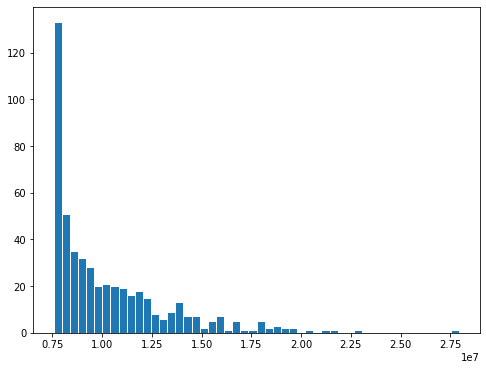

In [6]:
empirical_NN = data_distance(ER)
plot_data_distance(empirical_NN)

In [32]:
def logistic(x,x0, k):
    m = (1/ (1 + np.exp(-k*(x-x0))))       # b to better fit left end since it does not reach 0
    return m

In [8]:
print(np.median(empirical_NN))

9165762.002575917


In [9]:
# plot CDF of empirical data
def plot_empirical_CDF(data, Density):
    f, ax = plt.subplots(1,1,figsize=(8,6))
    h = ax.hist(data,bins=499,density=Density,cumulative=True,histtype='stepfilled')    # bins set to equal to # of empirical data
    x = h[1][:-1]
    y = h[0]
    ax.plot(x,y,color='k', label='Empirical')
    ax.legend()
    plt.show()
    return x,y

In [49]:
# plot CDF of empirical data + fitted Sigmoid
def plot_sigmoid(data,Density, func, param):
    f, ax = plt.subplots(1,1,figsize=(10,8))
    h = ax.hist(data,bins=499,density=Density,edgecolor='white',cumulative=True,histtype='step')
    x = h[1][:-1]
    y = h[0]

    y2 = func(x/1e7,*param)    # by func curve_fit
    #ax.plot(x,y,color='k', label='Empirical')
    #ax.plot(x,y2,color='r',label='sigmoid')
    ax.set_yscale('log')
    ax.plot(x[:-100],1-y[:-100],color='g',label='1-empirical')
    ax.scatter(x[:])
    ax.plot(x,1-y2,color='y',label='1-sigmoid')
    ax.legend(loc='upper left')
    plt.show()
    return x,y,y2

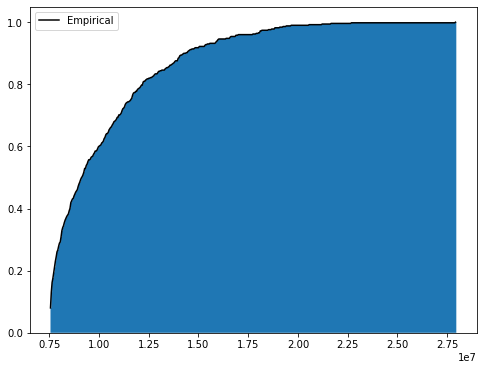

In [34]:
# plot empirical CDF
x,y = plot_empirical_CDF(empirical_NN, Density=True)

In [35]:
# empirical_NN start and end
print(x[0],x[-1])

7561299.601992339 27918532.02121464


[0.93944918 4.83991347]


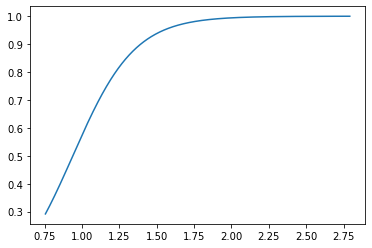

In [37]:
# Curve_fit
p0 = [np.median(empirical_NN)/1e7,1] # this is initial guess for curve_fit()

popt, pcov = curve_fit(f=logistic, xdata=x/1e7, ydata=y, p0=p0,method='lm')

# parameters yielded by Curve_fit: x0, k , b
print(popt)

y2 = logistic(x/1e7, *popt)
plt.plot(x/1e7,y2)
plt.show()

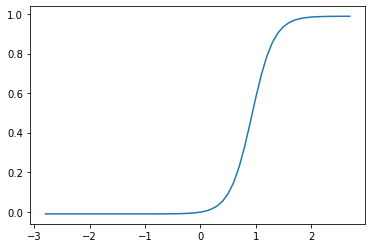

In [14]:
x3 = np.arange(-2.8,2.8,0.1)
y3 = logistic(x3,*popt)
plt.plot(x3,y3)
plt.show()

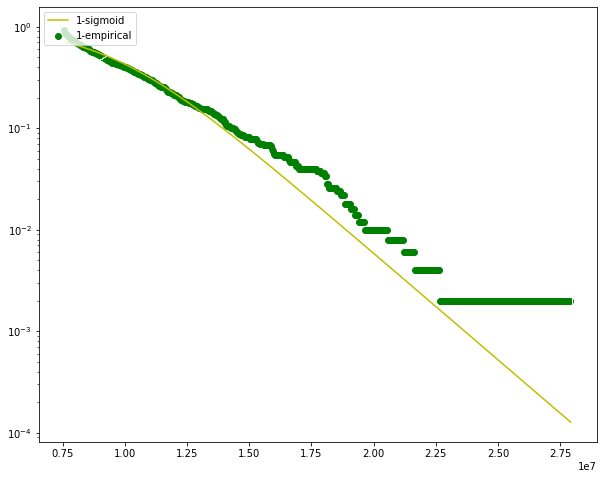

In [50]:
# plot fitted sigmoid
# by Curve_fit
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=popt) 

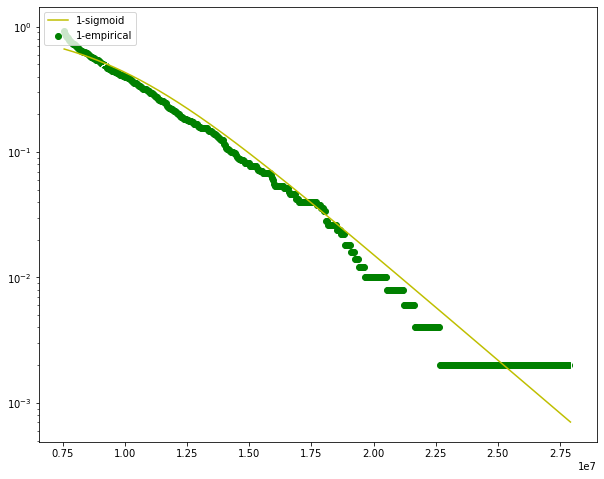

1.0000000000000007 0.999296696720741


In [58]:
# plot fitted sigmoid
# change growth rate k by hand
# param = [x0, k ,b]
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=[0.93056633,3.9])
print(y[-1],y2[-1])

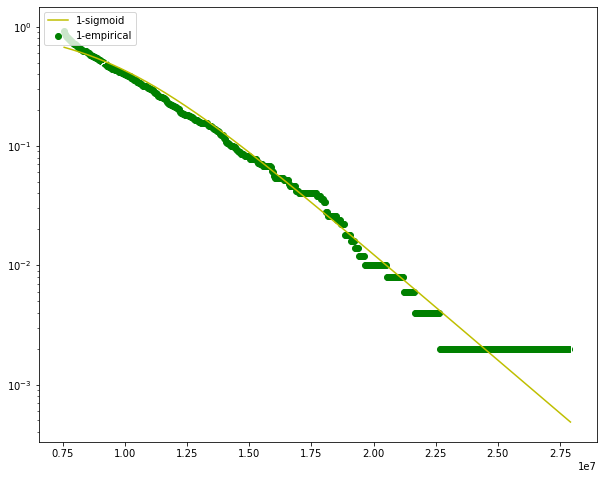

1.0000000000000007 0.999515193686098


In [61]:
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=[0.93056633,4.1])
print(y[-1],y2[-1])

In [51]:
# head y-value
print(x[0],y[0],y2[0],x[-1])

7561299.601992339 0.08016032064128256 0.29167783161832767 27918532.02121464


In [40]:
# tail y-value
print(y[-1],y2[-1])

1.0000000000000007 0.9998722714075071


In [17]:
def MSE(y,y2):
    return np.mean((y2-y)**2)

In [18]:
print(MSE(y,y2))

0.0004711011531067275


## all AT in one figure (empirical + sigmoid for each at-)